# 整理

* 新增特徵欄位Delay_rate  --> 遲繳比例 (ex 若有四期 其有一期遲繳超過一天的話就是1/4)
* 新增特徵欄位Contract_Change --> 提早繳完 且 不在目前進行中的貸款
* 新增特徵欄位Total_Months --> 總還款期數 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.__version__ , np.__version__

('0.25.3', '1.17.4')

---

此資料夾是有關"Home cridit"這間公司提供的銷售點(point of sales)與現金貸款服務資料

每一行代表的都是該筆金額分期的當月訊息，一列為一個月

包含 相對於申請日期的餘額月份、合約分幾期、還剩幾期、分期合約狀態、逾期天數

---

In [4]:
# 家
# data = pd.read_csv('POS_CASH_balance.csv')
# data_test = data
# 學校
POS_data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\POS_CASH_balance.csv')
data_test = POS_data
# 組長
# POS_data = pd.read_csv('../../datasets/homecdt_eda/POS_CASH_balance.csv')

In [5]:
POS_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [6]:
# 空值
POS_data.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

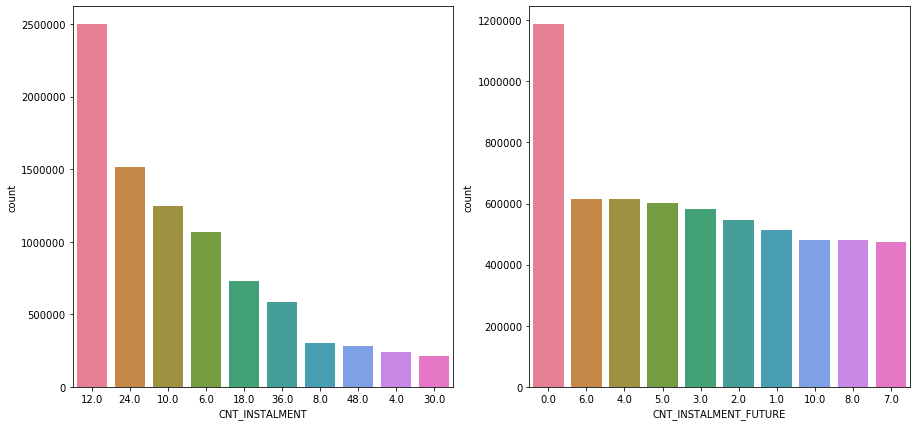

In [7]:
# 申請幾期的分期
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(POS_data["CNT_INSTALMENT"],
              order=POS_data["CNT_INSTALMENT"].value_counts().index[:10],palette="husl")
# 還有幾期的分期
plt.subplot(122)
sns.countplot(POS_data["CNT_INSTALMENT_FUTURE"],
              order=POS_data["CNT_INSTALMENT_FUTURE"].value_counts().index[:10],palette="husl")

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64


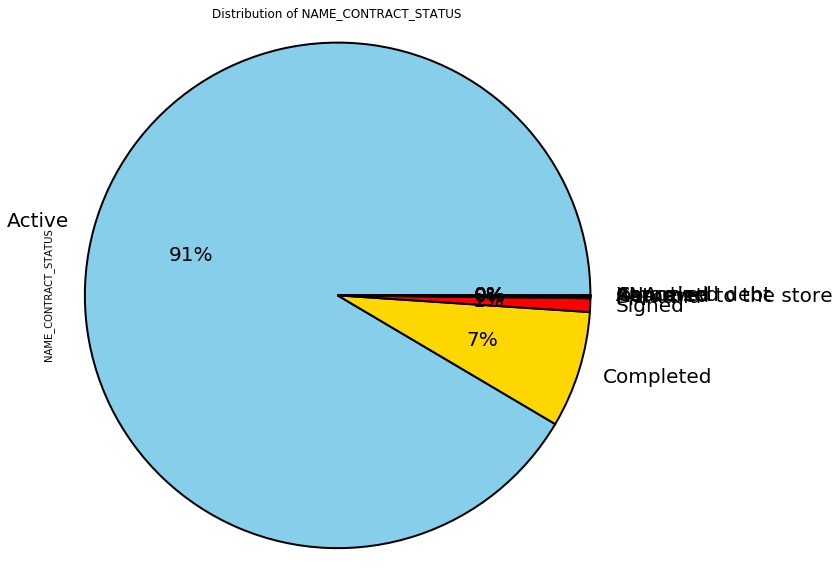

In [8]:
# object分類
data_object = list(POS_data.columns[POS_data.dtypes=="object"])
data_object_count = len(data_object)
for name in data_object:     
    print(POS_data[name].value_counts())
    plt.figure(figsize=(10,10))
    POS_data[name].value_counts().plot.pie(autopct = "%0.f%%",colors = ["skyblue","gold","r","b","g"],
                                                  wedgeprops={"linewidth":2,"edgecolor":"k"},textprops = {'fontsize':20, 'color':'k'},)
    plt.axis('equal')
    plt.title("Distribution of " + name )
#      plt.show()

In [9]:
# 共有多少個過去申請
PREV = POS_data["SK_ID_PREV"].unique().shape[0]
CURR = POS_data["SK_ID_CURR"].unique().shape[0]

print(f"共有{PREV}個前申請")
print(f"共有{CURR}個目前申請")

共有936325個前申請
共有337252個目前申請


<h1>測試用

---

In [10]:
# # 將有特殊狀態的欄位新增 (onehot)
# categorical_columns = []
# for name in data_test:
#     if data_test[name].dtype=='object':
#         categorical_columns.append(name)
# data_test = pd.get_dummies(data_test, columns = categorical_columns)

# data_test.rename(columns={'NAME_CONTRACT_STATUS_Active':'Active',
#                      'NAME_CONTRACT_STATUS_Amortized debt':'Amortized debt',
#                     'NAME_CONTRACT_STATUS_Approved':'Approved',
#                     'NAME_CONTRACT_STATUS_Canceled':'Canceled',
#                     'NAME_CONTRACT_STATUS_Completed':'Completed',
#                     'NAME_CONTRACT_STATUS_Demand':'Demand',
#                     'NAME_CONTRACT_STATUS_Returned to the store':'Returned to the store',
#                     'NAME_CONTRACT_STATUS_Signed':'Signed',
#                     'NAME_CONTRACT_STATUS_XNA':'XNA'},inplace=True)

In [11]:
# # 新增欄位

# data_test['Delay']=(data_test['SK_DPD']>0).replace(True,1) # 該期貸款有愈期，1為有延遲，0為沒延遲
# data_test['SK_DPD_mean']=data_test['SK_DPD'] # 要算平均
# data_test['CNT_INSTALMENT_min']=data_test['CNT_INSTALMENT'] # 申請期最小值
# data_test['CNT_INSTALMENT_median']=data_test['CNT_INSTALMENT'] # 申請期的中位數
# data_test['MONTHS_BALANCE_start']=data_test['MONTHS_BALANCE'] # 貸款開始時間
# data_test['MONTHS_BALANCE_finish']=data_test['MONTHS_BALANCE'] # 貸款結束時間

In [12]:

# # 創造新的欄位 
# num_aggregations = {
#         'MONTHS_BALANCE':'count',
#         'MONTHS_BALANCE_start':'min',
#         'MONTHS_BALANCE_finish':'max', 
#         'CNT_INSTALMENT' : 'max',
#         'CNT_INSTALMENT_min':'min',
#         'CNT_INSTALMENT_median':'median',
#         'Delay':'mean',
#         'SK_DPD':'max',
#         'SK_DPD_mean':'mean',
#         'Completed':'max',
#         'Active':'sum',
#         'Signed':'sum',
#         'Demand':'sum',
#         'Returned to the store':'sum',
#         'Approved':'sum',
#         'Amortized debt':'sum',
#         'Canceled':'sum',
#         'XNA':'sum'
#     }

# data_1 = data_test.groupby(['SK_ID_CURR',
#                                     'SK_ID_PREV']).agg({**num_aggregations})
# # 做更名
# data_1.rename(columns={'MONTHS_BALANCE':'Total_Months',
#                       'Delay':"Delay_Rate",
#                       'SK_DPD':'SK_DPD_max',
#                       'CNT_INSTALMENT':'CNT_INSTALMENT_max'},inplace=True)
# # 重新排列
# data_1.reset_index(level=('SK_ID_CURR',
#                           'SK_ID_PREV'),inplace=True)

# # 提早繳完 且 不在目前進行中的貸款
# data_1['Contract_Change'] = ((data_1['Total_Months'] < data_1 ['CNT_INSTALMENT_max']) & (data_1['Completed'] != 0)).replace(True,1)
# # 合約縮短了多少期
# data_1['Contract_Change_count'] = data_1['CNT_INSTALMENT_max']-data_1['CNT_INSTALMENT_min']
# # 縮短了多少期除以申請期數
# data_1['Contract_Change_rate(CNT_INSTALMENT)'] = data_1['Contract_Change_count']/data_1['CNT_INSTALMENT_max']
# # 縮短了多少期除以總還款期數
# data_1['Contract_Change_rate(Total_Months)'] = data_1['Contract_Change_count']/data_1['Total_Months']
# # 狀態發生期數除以總還款期數
# data_1['Active'] = data_1['Active']/data_1['Total_Months']
# data_1['Signed'] = data_1['Signed']/data_1['Total_Months']
# data_1['Demand'] = data_1['Demand']/data_1['Total_Months']
# data_1['Returned to the store'] = data_1['Returned to the store']/data_1['Total_Months']
# data_1['Approved'] = data_1['Approved']/data_1['Total_Months']
# data_1['Amortized debt'] = data_1['Amortized debt']/data_1['Total_Months']
# data_1['Canceled'] = data_1['Canceled']/data_1['Total_Months']
# data_1['XNA'] = data_1['XNA']/data_1['Total_Months']


# # Total_Months --> 總還款期數
# # MONTHS_BALANCE_start --> 貸款開始時間
# # MONTHS_BALANCE_finish --> 貸款結束時間
# # CNT_INSTALMENT_max --> 最大申請期數(擬定合約期數)
# # CNT_INSTALMENT_min --> 最小申請期數(中間改合約)
# # CNT_INSTALMENT_median --> 申請期數中位數
# # Delay_Rate --> 遲繳比例(ex 共四期 有一期遲繳就是1/4)
# # SK_DPD_max --> 貸款愈期最大天數
# # SK_DPD_mean --> 貸款逾期平均數
# # Contract_Change -- > 提早繳完 且 不在目前進行中的貸款
# # Contract_Change_count --> 合約縮短了多少期
# # Contract_Change_rate(CNT_INSTALMENT) --> 縮短了多少期除以申請期數
# # Contract_Change_rate(Total_Months) --> 縮短了多少期除以總還款期數

<h1>特徵工程

In [13]:
pd.set_option("display.max_rows",None)
data_test[data_test["SK_ID_PREV"]==1366380].sort_values(by=["MONTHS_BALANCE"],ascending=False)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF


In [15]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
POS_data_1.head(200)

,SK_ID_CURR,SK_ID_PREV,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
0,100001,1369693,5,-57,-53,4.0,4.0,4.0,0.000000,0,0.000000,1,0.800000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.000000,0.000000
1,100001,1851984,4,-96,-93,4.0,4.0,4.0,0.250000,7,1.750000,1,0.750000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
2,100002,1038818,19,-19,-1,24.0,24.0,24.0,0.000000,0,0.000000,0,1.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.263158,0.000000,0.000000
3,100003,1810518,8,-25,-18,12.0,7.0,12.0,0.000000,0,0.000000,1,0.875000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,1.0,5.0,1.500000,0.416667,0.625000
4,100003,2396755,12,-77,-66,12.0,12.0,12.0,0.000000,0,0.000000,0,1.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
5,100003,2636178,8,-28,-21,6.0,6.0,6.0,0.000000,0,0.000000,1,0.875000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.000000,0.000000
6,100004,1564014,4,-27,-24,4.0,3.0,4.0,0.000000,0,0.000000,1,0.750000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.250000,0.250000
7,100005,2495675,11,-25,-15,12.0,9.0,12.0,0.000000,0,0.000000,1,0.818182,0.090909,0.0,0.000,0.0,0.0,0.0,0.0,1.0,3.0,1.090909,0.250000,0.272727
8,100006,2078043,3,-6,-4,48.0,1.0,1.0,0.000000,0,0.000000,1,0.666667,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,1.0,47.0,16.000000,0.979167,15.666667
9,100006,2190416,10,-10,-1,12.0,12.0,12.0,0.000000,0,0.000000,0,1.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.200000,0.000000,0.000000


In [14]:
# 2020-01-16

# Total_Months --> 總還款期數
# MONTHS_BALANCE_start --> 貸款開始時間
# MONTHS_BALANCE_finish --> 貸款結束時間
# CNT_INSTALMENT_max --> 最大申請期數(擬定合約期數)
# CNT_INSTALMENT_min --> 最小申請期數(中間改合約)
# CNT_INSTALMENT_median --> 申請期數中位數
# Delay_Rate --> 遲繳比例(ex 共四期 有一期遲繳就是1/4)
# SK_DPD_max --> 貸款愈期最大天數
# SK_DPD_mean --> 貸款逾期平均數
# Contract_Change -- > 提早繳完 且 不在目前進行中的貸款
# Contract_Change_count --> 合約縮短了多少期
# CNT_INSTALMENT/Total_Months_rate --> 申請期數與總還款期數比例
# Contract_Change_rate(CNT_INSTALMENT) --> 縮短了多少期除以申請期數
# Contract_Change_rate(Total_Months) --> 縮短了多少期除以總還款期數

# 將有特殊狀態的欄位新增 (onehot)
categorical_columns = []
for name in POS_data:
    if POS_data[name].dtype=='object':
        categorical_columns.append(name)
POS_data = pd.get_dummies(POS_data, columns = categorical_columns)

POS_data.rename(columns={'NAME_CONTRACT_STATUS_Active':'Active',
                     'NAME_CONTRACT_STATUS_Amortized debt':'Amortized debt',
                    'NAME_CONTRACT_STATUS_Approved':'Approved',
                    'NAME_CONTRACT_STATUS_Canceled':'Canceled',
                    'NAME_CONTRACT_STATUS_Completed':'Completed',
                    'NAME_CONTRACT_STATUS_Demand':'Demand',
                    'NAME_CONTRACT_STATUS_Returned to the store':'Returned to the store',
                    'NAME_CONTRACT_STATUS_Signed':'Signed',
                    'NAME_CONTRACT_STATUS_XNA':'XNA'},inplace=True)

# 新增欄位

POS_data['Delay']=(POS_data['SK_DPD']>0).replace(True,1) # 該期貸款有愈期，1為有延遲，0為沒延遲
POS_data['SK_DPD_mean']=POS_data['SK_DPD'] # 要算平均
POS_data['CNT_INSTALMENT_min']=POS_data['CNT_INSTALMENT'] # 申請期最小值
POS_data['CNT_INSTALMENT_median']=POS_data['CNT_INSTALMENT'] # 申請期的中位數
POS_data['MONTHS_BALANCE_start']=POS_data['MONTHS_BALANCE'] # 貸款開始時間
POS_data['MONTHS_BALANCE_finish']=POS_data['MONTHS_BALANCE'] # 貸款結束時間


# 創造新的欄位 
num_aggregations = {
        'MONTHS_BALANCE':'count',
        'MONTHS_BALANCE_start':'min',
        'MONTHS_BALANCE_finish':'max', 
        'CNT_INSTALMENT' : 'max',
        'CNT_INSTALMENT_min':'min',
        'CNT_INSTALMENT_median':'median',
        'Delay':'mean',
        'SK_DPD':'max',
        'SK_DPD_mean':'mean',
        'Completed':'max',
        'Active':'sum',
        'Signed':'sum',
        'Demand':'sum',
        'Returned to the store':'sum',
        'Approved':'sum',
        'Amortized debt':'sum',
        'Canceled':'sum',
        'XNA':'sum'
    }

POS_data_1 = POS_data.groupby(['SK_ID_CURR',
                                    'SK_ID_PREV']).agg({**num_aggregations})
# 做更名
POS_data_1.rename(columns={'MONTHS_BALANCE':'Total_Months',
                      'Delay':"Delay_Rate",
                      'SK_DPD':'SK_DPD_max',
                      'CNT_INSTALMENT':'CNT_INSTALMENT_max'},inplace=True)
# 重新排列
POS_data_1.reset_index(level=('SK_ID_CURR',
                          'SK_ID_PREV'),inplace=True)

# 提早繳完 且 不在目前進行中的貸款
POS_data_1['Contract_Change'] = ((POS_data_1['Total_Months'] < POS_data_1 ['CNT_INSTALMENT_max']) & (POS_data_1['Completed'] != 0)).replace(True,1)
# 合約縮短了多少期
POS_data_1['Contract_Change_count'] = POS_data_1['CNT_INSTALMENT_max']-POS_data_1['CNT_INSTALMENT_min']
# 申請期數與總還款期數比例
POS_data_1['CNT_INSTALMENT/Total_Months_rate'] = POS_data_1['CNT_INSTALMENT_max']/POS_data_1['Total_Months']
# 縮短了多少期除以申請期數
POS_data_1['Contract_Change_rate(CNT_INSTALMENT)'] = POS_data_1['Contract_Change_count']/POS_data_1['CNT_INSTALMENT_max']
# 縮短了多少期除以總還款期數
POS_data_1['Contract_Change_rate(Total_Months)'] = POS_data_1['Contract_Change_count']/POS_data_1['Total_Months']
# 狀態發生期數除以總還款期數
POS_data_1['Active'] = POS_data_1['Active']/POS_data_1['Total_Months']
POS_data_1['Signed'] = POS_data_1['Signed']/POS_data_1['Total_Months']
POS_data_1['Demand'] = POS_data_1['Demand']/POS_data_1['Total_Months']
POS_data_1['Returned to the store'] = POS_data_1['Returned to the store']/POS_data_1['Total_Months']
POS_data_1['Approved'] = POS_data_1['Approved']/POS_data_1['Total_Months']
POS_data_1['Amortized debt'] = POS_data_1['Amortized debt']/POS_data_1['Total_Months']
POS_data_1['Canceled'] = POS_data_1['Canceled']/POS_data_1['Total_Months']
POS_data_1['XNA'] = POS_data_1['XNA']/POS_data_1['Total_Months']


In [ ]:
# 2020-01-15

# # 新增欄位

# data['Delay']=(data['SK_DPD']>0).replace(True,1) # 該期貸款有愈期，1為有延遲，0為沒延遲

# # 將有特殊狀態的欄位新增 (onehot)
# categorical_columns = []
# for name in data:
#     if data[name].dtype=='object':
#         categorical_columns.append(name)
# data = pd.get_dummies(data, columns = categorical_columns)

# data.rename(columns={'NAME_CONTRACT_STATUS_Active':'Active',
#                      'NAME_CONTRACT_STATUS_Amortized debt':'Amortized debt',
#                     'NAME_CONTRACT_STATUS_Approved':'Approved',
#                     'NAME_CONTRACT_STATUS_Canceled':'Canceled',
#                     'NAME_CONTRACT_STATUS_Completed':'Completed',
#                     'NAME_CONTRACT_STATUS_Demand':'Demand',
#                     'NAME_CONTRACT_STATUS_Returned to the store':'Returned to the store',
#                     'NAME_CONTRACT_STATUS_Signed':'Signed',
#                     'NAME_CONTRACT_STATUS_XNA':'XNA'},inplace=True)


# # 創造新的欄位 
# num_aggregations = {
#         'MONTHS_BALANCE':'count',
#         'CNT_INSTALMENT' : 'max',
#         'Delay':'mean',
#         'SK_DPD':'max',
#         'Active':'max',
#         'Completed':'max',
#         'Signed':'max',
#         'Demand':'max',
#         'Returned to the store':'max',
#         'Approved':'max',
#         'Amortized debt':'max',
#         'Canceled':'max',
#         'XNA':'max'
#     }

# data_1 = data.groupby(['SK_ID_CURR',
#                                     'SK_ID_PREV']).agg({**num_aggregations})
# # 做更名
# data_1.rename(columns={'MONTHS_BALANCE':'Total_Months',
#                       'Delay':"Delay_Rate",
#                       'SK_DPD':'Delay_day_max'},inplace=True)
# # 重新排列
# data_1.reset_index(level=('SK_ID_CURR',
#                           'SK_ID_PREV'),inplace=True)

# data_1['Contract_Change'] = ((data_1['Total_Months'] < data_1 ['CNT_INSTALMENT']) & (data_1['Completed'] != 0)).replace(True,1)


# # Total_Months --> 總還款期數 
# # CNT_INSTALMENT --> 申請期數
# # Delay_Rate --> 遲繳比例(ex 共四期 有一期遲繳就是1/4)
# # Delay_day_max --> 改筆貸款愈期最大天數
# # Contract_Change -- >提早繳完 且 不在目前進行中的貸款

<EDA>

<h1>EDA

In [13]:
# 去掉重複
DPD = POS_data[data["SK_DPD"]>0]
DPD_count=DPD["SK_ID_PREV"].unique().shape[0]
print(f'共有 {DPD_count} 個過期POS貸款')

共有 77032 個過期POS貸款


In [14]:
DPD["SK_DPD"].describe()

count    295227.000000
mean        393.206058
std         668.302135
min           1.000000
25%           5.000000
50%          19.000000
75%         528.000000
max        4231.000000
Name: SK_DPD, dtype: float64

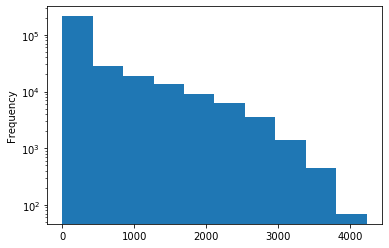

In [15]:
DPD["SK_DPD"].plot.hist(log=True)

In [16]:
pd.set_option("display.max_rows",None)
POS_data[data["SK_ID_CURR"]==334279].sort_values(by=["SK_ID_PREV","MONTHS_BALANCE"],ascending=False)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,delay,delay_high
8016179,2578168,334279,-8,12.0,0.0,Completed,0,0,0.0,0.0
9369636,2578168,334279,-9,12.0,1.0,Active,0,0,0.0,0.0
8758829,2578168,334279,-10,12.0,2.0,Active,0,0,0.0,0.0
7596710,2578168,334279,-11,12.0,3.0,Active,0,0,0.0,0.0
2694795,2578168,334279,-12,12.0,4.0,Active,0,0,0.0,0.0
5876072,2578168,334279,-13,12.0,5.0,Active,0,0,0.0,0.0
7855507,2578168,334279,-14,12.0,6.0,Active,0,0,0.0,0.0
149864,2578168,334279,-15,12.0,7.0,Active,0,0,0.0,0.0
5143749,2578168,334279,-16,12.0,8.0,Active,0,0,0.0,0.0
2330867,2578168,334279,-17,12.0,9.0,Active,0,0,0.0,0.0
